# Book recommendation system using K nearest neighbor algorithm

In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

### books data

In [2]:
books_df = pd.read_csv('./csv/Books.csv')
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
# info
books_df.info(), books_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


(None, (271360, 8))

In [4]:
# Remove unwanted columns
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author']]

In [5]:
# checking for missing values
books_df.isna().sum()

ISBN           0
Book-Title     0
Book-Author    2
dtype: int64

In [6]:
# Removing rows with missing values
books_df.dropna(axis=0, how='any', inplace=True)

In [7]:
books_df.isna().sum(), books_df.shape

(ISBN           0
 Book-Title     0
 Book-Author    0
 dtype: int64,
 (271358, 3))

### Ratings csv

In [8]:
ratings_df = pd.read_csv('./csv/Ratings.csv')
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
# Ratings range from 0 to 10
ratings_df['Book-Rating'].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [11]:
# check and remove missing values in ratings df if any
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
ratings_df.shape

(1149780, 3)

#### Sort ratings

In [13]:
ratings = ratings_df['User-ID'].value_counts()
ratings.sort_values(ascending=False)
ratings

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

### Check and remove users with less than 200 ratings

In [14]:
# number of books lessthan 200 ratings
u_ratings = ratings[ratings < 200]
len(u_ratings), u_ratings.head()

(104378,
 User-ID
 193458    199
 240403    199
 203017    199
 79942     198
 267061    198
 Name: count, dtype: int64)

In [15]:
# removing users who rated less than 200 books
rm_ratings_df = ratings_df[~ratings_df['User-ID'].isin(u_ratings.index)]
rm_ratings_df.head(), rm_ratings_df.shape

(      User-ID        ISBN  Book-Rating
 1456   277427  002542730X           10
 1457   277427  0026217457            0
 1458   277427  003008685X            8
 1459   277427  0030615321            0
 1460   277427  0060002050            0,
 (527556, 3))

### Check and remove books with less than 100 ratings

In [16]:
b_ratings = ratings_df.ISBN.value_counts()
b_ratings.sort_values(ascending=False).head()

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
Name: count, dtype: int64

In [17]:
b_ratings = b_ratings[b_ratings < 100]
b_ratings.shape

(339825,)

In [18]:
# sum of books in books_df with ratings less than 100
books_df.ISBN.isin(b_ratings.index).sum()

269422

In [19]:
rm_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527556 entries, 1456 to 1147616
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      527556 non-null  int64 
 1   ISBN         527556 non-null  object
 2   Book-Rating  527556 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 16.1+ MB


In [20]:
# Removing books that are rated less than 100 times
rm_ratings_df = rm_ratings_df[~rm_ratings_df.ISBN.isin(b_ratings.index)]
rm_ratings_df.shape

(49781, 3)

In [21]:
rm_ratings_df.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1484,277427,0140067477,0


In [22]:
# checking some books
books = ["Where the Heart Is (Oprah's Book Club (Paperback))",
        "I'll Be Seeing You",
        "The Weight of Water",
        "The Surgeon",
        "I Know This Much Is True"]
for book in books:
    print(rm_ratings_df.ISBN.isin(books_df[books_df['Book-Title'] == book]['ISBN']).sum())

183
75
49
57
77


## EDA - Exploratory Data Analysis

In [23]:
ratings_with_name = ratings_df.merge(books_df, on='ISBN')

In [24]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose
1,276726,0155061224,5,Rites of Passage,Judith Rae
2,276727,0446520802,0,The Notebook,Nicholas Sparks
3,276729,052165615X,3,Help!: Level 1,Philip Prowse
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather


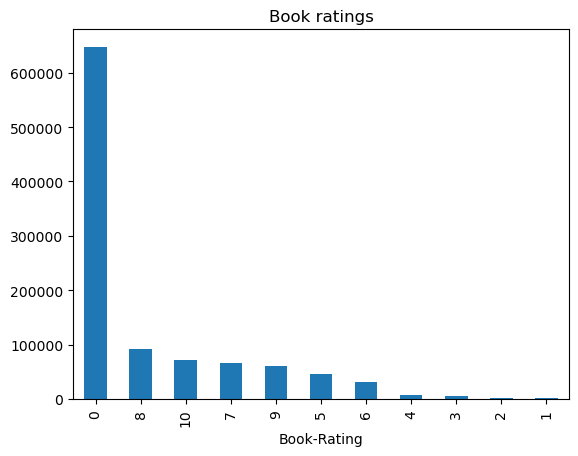

In [25]:
ratings_with_name['Book-Rating'].value_counts().plot(kind='bar', title='Book ratings');

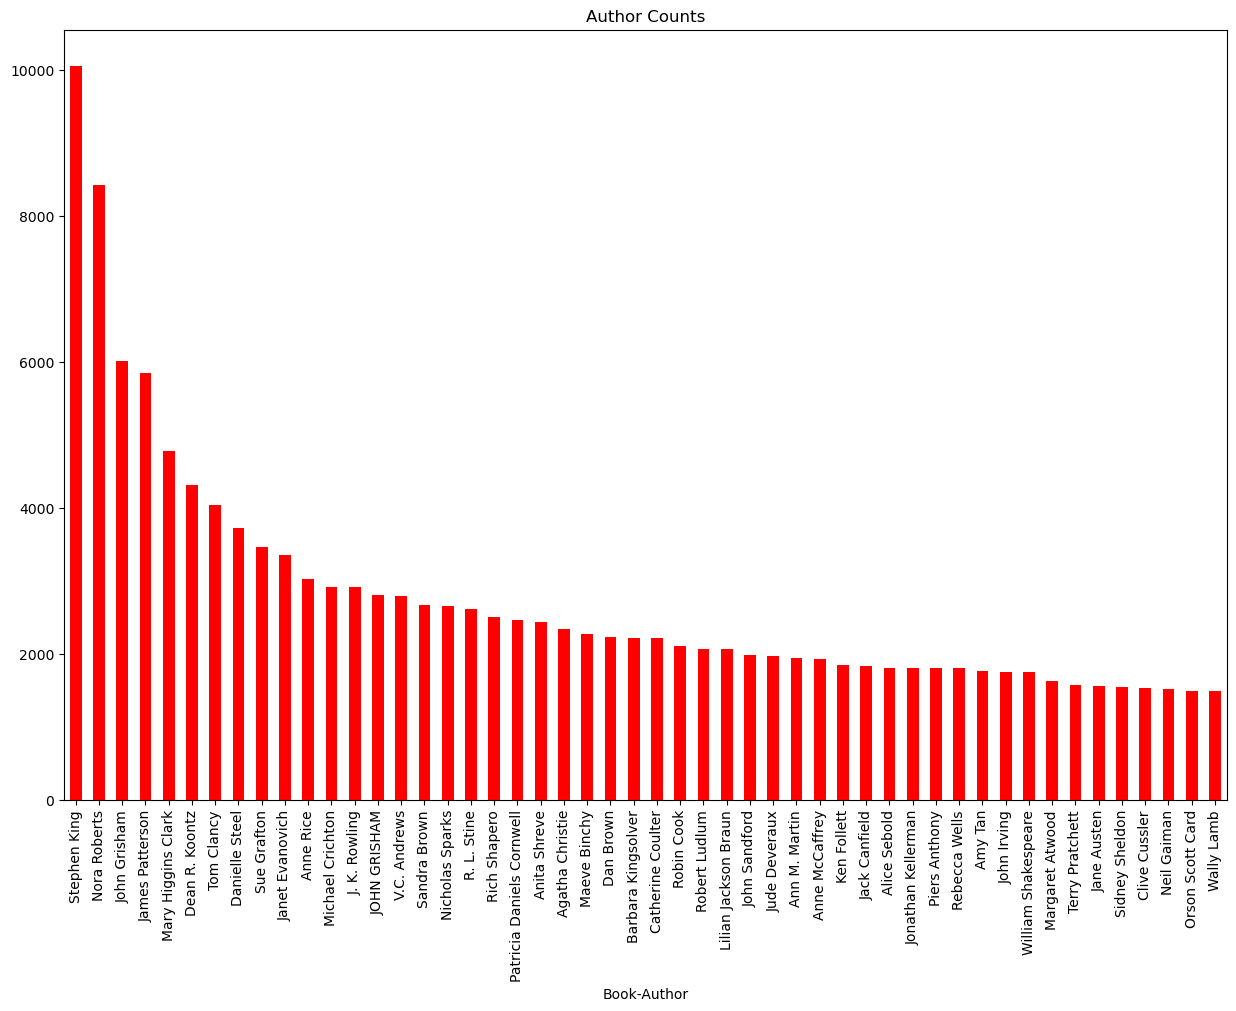

In [26]:
plt.figure(figsize=(15, 10))
ratings_with_name['Book-Author'].value_counts().head(50).plot(kind='bar', color='red', title='Author Counts');

In [27]:
# Group by 'Book-Title' and count 'Book-Rating'
num_rating_df_t = ratings_with_name.groupby('Book-Title').count()['Book-Rating']

# Sort the DataFrame in descending order
num_rating_df_t = num_rating_df_t.sort_values(ascending=False).reset_index()
num_rating_df_t.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df_t
# Display the result
num_rating_df_t

ratings_with_name['Book-Rating'] = pd.to_numeric(ratings_with_name['Book-Rating'], errors='coerce')

num_rating_df_t = ratings_with_name.groupby('Book-Title').mean(numeric_only=True)['Book-Rating']

num_rating_df_t = num_rating_df_t.to_frame()
num_rating_df_t.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)
num_rating_df_t = num_rating_df_t.reset_index()

num_rating_df_t

# Group by 'Book-Title' and count 'Book-Rating'
num_rating_df_t = ratings_with_name.groupby('Book-Title').agg({'Book-Rating': 'count'}).reset_index()

# Sort the DataFrame in descending order of ratings
num_rating_df_t = num_rating_df_t.sort_values(by='Book-Rating', ascending=False).reset_index(drop=True)

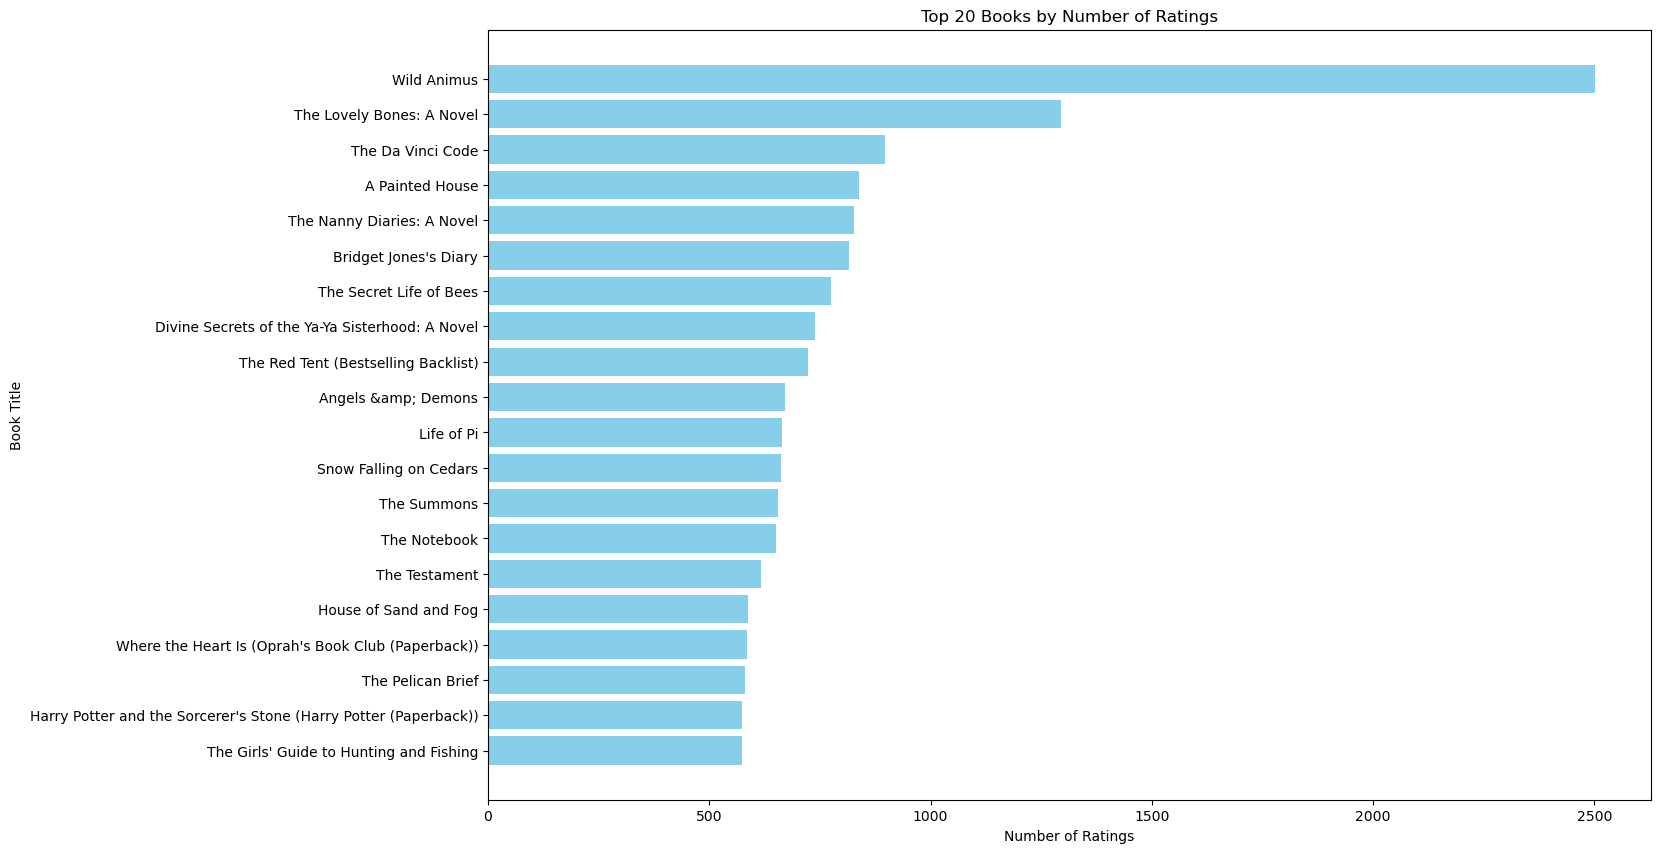

In [28]:
# Assuming num_rating_df has 'Book-Title' and 'Book-Rating' columns
plt.figure(figsize=(15, 10))

# Plot the top 20 books by number of ratings
plt.barh(num_rating_df_t['Book-Title'].head(20), num_rating_df_t['Book-Rating'].head(20), color='skyblue')

# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 20 Books by Number of Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating on top

# Show the plot
plt.show()

In [29]:
# Group by 'Book-Author' and count 'Book-Rating'
num_rating_df = ratings_with_name.groupby('Book-Author').count()['Book-Rating']

# Sort the DataFrame in descending order
num_rating_df = num_rating_df.sort_values(ascending=False).reset_index()

# Display the result
num_rating_df

# Group by 'Book-Author' and count 'Book-Rating'
num_rating_df = ratings_with_name.groupby('Book-Author').agg({'Book-Rating': 'count'}).reset_index()

# Sort the DataFrame in descending order of ratings
num_rating_df = num_rating_df.sort_values(by='Book-Author', ascending=False).reset_index(drop=True)

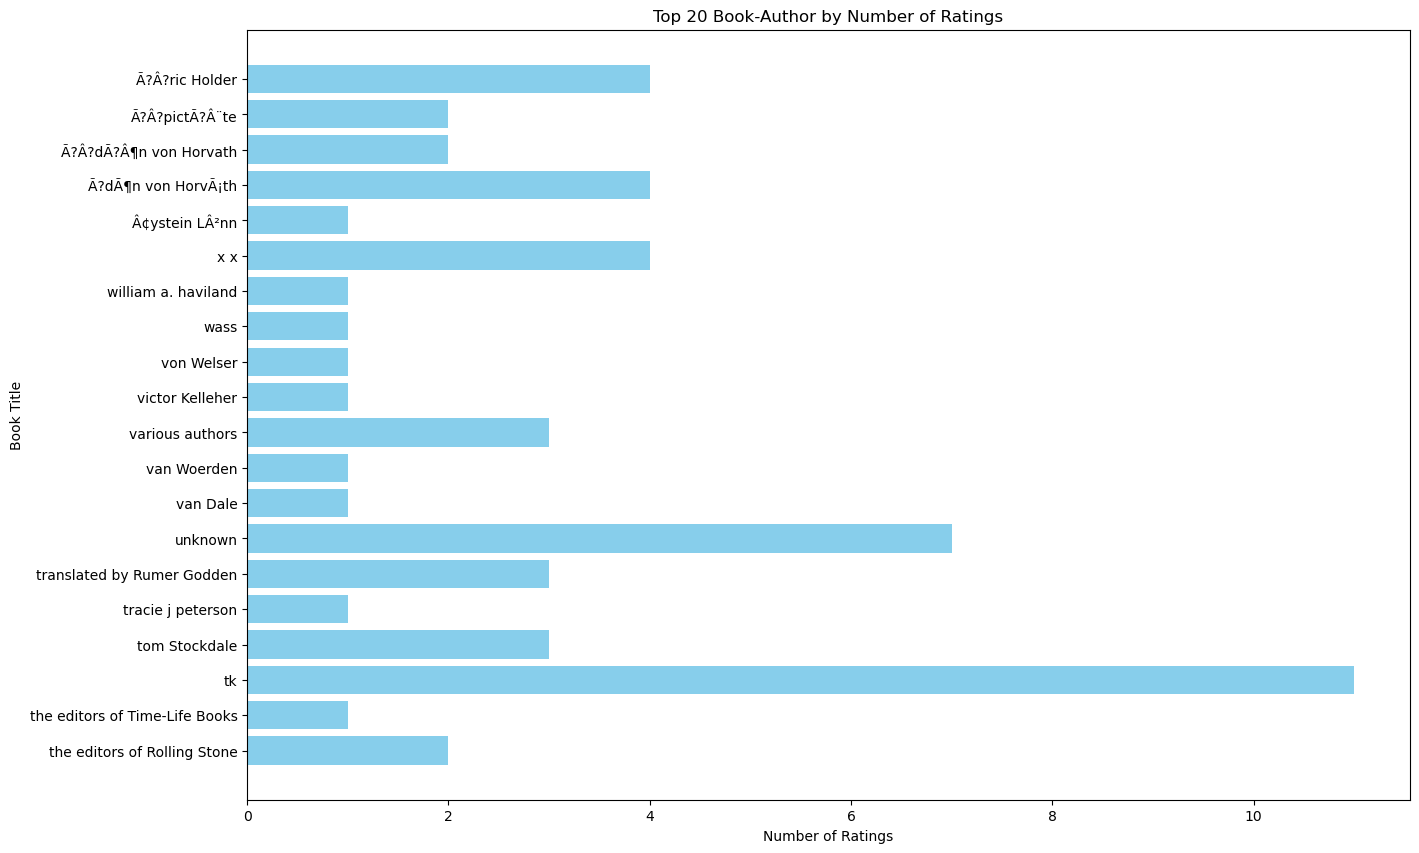

In [30]:
plt.figure(figsize=(15, 10))
plt.barh(num_rating_df['Book-Author'].head(20), num_rating_df['Book-Rating'].head(20), color='skyblue')
# Add labels and title
plt.xlabel('Number of Ratings')
plt.ylabel('Book Title')
plt.title('Top 20 Book-Author by Number of Ratings')
plt.gca().invert_yaxis()  

# Show the plot
plt.show()

## Prepare data for ML

In [31]:
books_df.head()

,ISBN,Book-Title,Book-Author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [32]:
rm_ratings_df.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1469,277427,0060930535,0
1471,277427,0060934417,0
1474,277427,0061009059,9
1484,277427,0140067477,0


In [33]:
df = rm_ratings_df.pivot_table(index=['User-ID'], columns=['ISBN'], values='Book-Rating').fillna(0).T
df.head(), df.shape

(User-ID     254     2276    2766    2977    3363    4017    4385    6242    \
 ISBN                                                                         
 002542730X     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 0060008032     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 0060096195     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 006016848X     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 0060173289     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
 User-ID     6251    6323    ...  274004  274061  274301  274308  274808  \
 ISBN                        ...                                           
 002542730X     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
 0060008032     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
 0060096195     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
 006016848X     0.0     0.0  ...     0.0     0.0     0.0     0.0 

In [34]:
df.index = df.join(books_df.set_index('ISBN'))['Book-Title']

In [35]:
df = df.sort_index()
df.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# locating book name (used as a index) to get all its review
df.loc['Dead Sleep'][:10]

User-ID
254     0.0
2276    0.0
2766    0.0
2977    0.0
3363    0.0
4017    0.0
4385    0.0
6242    0.0
6251    0.0
6323    0.0
Name: Dead Sleep, dtype: float64

In [37]:
len(df.values[1])

888

## Modelling

In [38]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

NearestNeighbors(metric='cosine')

In [39]:
# checking with a sample title
title = 'The Alchemist: A Fable About Following Your Dream'
distance, indice = model.kneighbors([df.loc[title].values], n_neighbors=6)
print(distance)
print(indice)

[[1.11022302e-16 7.02279419e-01 7.53951280e-01 7.64212157e-01
  7.70638284e-01 7.71812691e-01]]
[[466 402  19 147 110 611]]


In [40]:
df.iloc[indice[0]].index.values

array(['The Alchemist: A Fable About Following Your Dream',
       'SHIPPING NEWS', 'A Map of the World',
       "Daughter of Fortune : A Novel (Oprah's Book Club (Hardcover))",
       'Catch 22',
       'The Professor and the Madman: A Tale of Murder, Insanity, and the Making of The Oxford English Dictionary'],
      dtype=object)

In [41]:
# converting the predicted books to dataframe
pd.DataFrame({
    'title': df.iloc[indice[0]].index.values,
    'distance': distance[0]
}).sort_values(by='distance', ascending=True)

,title,distance
0,The Alchemist: A Fable About Following Your Dream,1.110223e-16
1,SHIPPING NEWS,7.022794e-01
2,A Map of the World,7.539513e-01
3,Daughter of Fortune : A Novel (Oprah's Book Cl...,7.642122e-01
4,Catch 22,7.706383e-01
5,The Professor and the Madman: A Tale of Murder...,7.718127e-01


### Create recommend() method

In [42]:
def recommend(title=''):
    try:
        book = df.loc[title]
    except KeyError as e:
        print(f'Given book {e} does not exist')
        return

    distance, indice = model.kneighbors([df.loc[title].values], n_neighbors=6)
    for book in df.iloc[indice[0]].index.values:
        print(book)

## Testing recommendation system

In [47]:
# title = 'The Alchemist: A Fable About Following Your Dream'
# title = 'House of Sand and Fog'
# title = 'Cause of Death'
# title = 'shoe dog'
title = 'Animal Farm'

In [48]:
books = recommend(title)
books

Animal Farm
On the Road
1984
The Corrections: A Novel
Call of the Wild
Winter Moon


---

In [107]:
    # recommended_books = pd.DataFrame({
    #     'title': df.iloc[indice[0]].index.values,
    #     'distance': distance[0]
    # }).sort_values(by='distance', ascending=True).values
    # print(df.iloc[indice[0]].index.values)